Attribute Information:
Complete attribute documentation:

1 Age: Age in years , linear

2 Sex: Sex (0 = male; 1 = female) , nominal

3 Height: Height in centimeters , linear

4 Weight: Weight in kilograms , linear

5 QRS duration: Average of QRS duration in msec., linear

6 P-R interval: Average duration between onset of P and Q waves in msec., linear

7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear

8 T interval: Average duration of T wave in msec., linear

9 P interval: Average duration of P wave in msec., linear Vector angles in degrees on front plane of:, linear

10 QRS

11 T

12 P

13 QRST

14 J

15 Heart rate: Number of heart beats per minute ,linear

Of channel DI:
Average width, in msec., of: linear

16 Q wave

17 R wave

18 S wave

19 R' wave, small peak just after R

20 S' wave

21 Number of intrinsic deflections, linear

22 Existence of ragged R wave, nominal

23 Existence of diphasic derivation of R wave, nominal

24 Existence of ragged P wave, nominal

25 Existence of diphasic derivation of P wave, nominal

26 Existence of ragged T wave, nominal

27 Existence of diphasic derivation of T wave, nominal

Of channel DII:

28 .. 39 (similar to 16 .. 27 of channel DI)
Of channels DIII:

40 .. 51
Of channel AVR:

52 .. 63
Of channel AVL:

64 .. 75
Of channel AVF:

76 .. 87
Of channel V1:

88 .. 99
Of channel V2:

100 .. 111
Of channel V3:

112 .. 123
Of channel V4:

124 .. 135
Of channel V5:

136 .. 147
Of channel V6:

148 .. 159
Of channel DI:
Amplitude , * 0.1 milivolt, of

160 JJ wave, linear
161 Q wave, linear
162 R wave, linear
163 S wave, linear
164 R' wave, linear
165 S' wave, linear
166 P wave, linear
167 T wave, linear
168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear 169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

Of channel DII:

170 .. 179
Of channel DIII:

180 .. 189
Of channel AVR:

190 .. 199
Of channel AVL:

200 .. 209
Of channel AVF:

210 .. 219
Of channel V1:

220 .. 229
Of channel V2:

230 .. 239
Of channel V3:

240 .. 249
Of channel V4:

250 .. 259
Of channel V5:

260 .. 269
Of channel V6:

270 .. 279

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score

In [106]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [107]:
train.describe()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000
mean,225.977500,46.687500,0.552500,166.195000,67.857500,88.740000,155.955000,368.542500,169.597500,90.235000,...,-0.264250,9.025000,-1.491750,0.004500,0.0,0.520000,1.247250,19.149250,29.540750,3.902500
std,131.543019,16.858243,0.497859,39.398701,17.063708,15.321203,45.034634,33.225412,35.550317,25.326535,...,0.528768,3.490801,2.079596,0.053262,0.0,0.350367,1.429476,13.758867,19.119788,4.353202
min,0.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,110.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,352.000000,148.000000,79.000000,...,-0.400000,6.500000,-2.100000,0.000000,0.0,0.400000,0.500000,11.000000,16.700000,1.000000
50%,227.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,368.000000,162.000000,90.500000,...,0.000000,8.750000,-1.200000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,342.250000,59.000000,1.000000,170.000000,79.000000,94.000000,175.000000,386.000000,178.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.400000,6.000000
max,451.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# Data Cleaning

In [108]:
train.isnull()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
missing_values = ["n/a", "na", " ?","?"]
train = pd.read_csv("train.csv", na_values = missing_values)
test = pd.read_csv("test.csv", na_values = missing_values)


 
###test = test.dropna()
###train= train.dropna()
# dropping all the missing values is leading to lot of loss in the data. 

In [110]:
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]


In [111]:
#removed rows whose age is zero
train.age.unique()
train =train[train.age != 0]

In [112]:
# removing column J as it has more than 90% of missing values in both test and train datasets
train =  train.drop('J',1)
test = test.drop('J',1)

In [113]:
train.isna().sum(axis = 0)

age              0
sex              0
height           0
weight           0
QRSduration      0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 279, dtype: int64

# Missing values imputation
### Imputed median if the distribution is skewed
### Imputed mean if the distribution is similar to normal

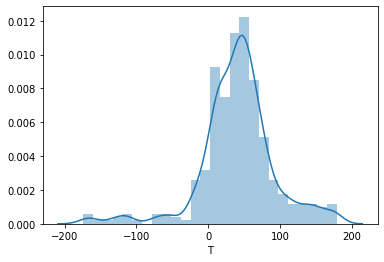

In [114]:
temp = train.dropna()
sns.distplot(temp['T'])
# so replacing missing values with mean

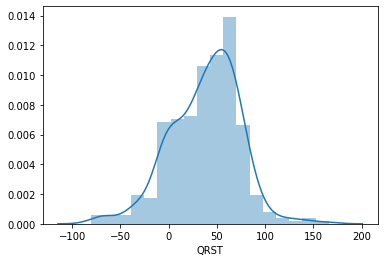

In [115]:
sns.distplot(temp['QRST'])# replacing missing values with mean

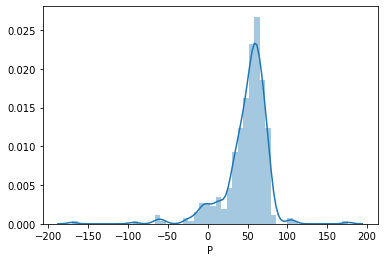

In [116]:
sns.distplot(temp['P'])# replacing missing values with median

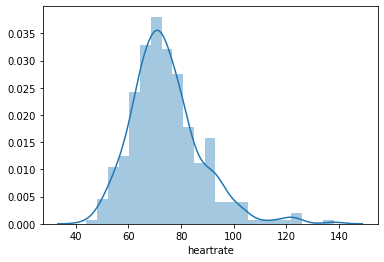

In [117]:
sns.distplot(temp['heartrate'])# replacing missing values with mean

In [118]:
test.isna().sum(axis = 0)

age               0
sex               0
height            0
weight            0
QRSduration       0
                 ..
chV6_SPwaveAmp    0
chV6_PwaveAmp     0
chV6_TwaveAmp     0
chV6_QRSA         0
chV6_QRSTA        0
Length: 278, dtype: int64

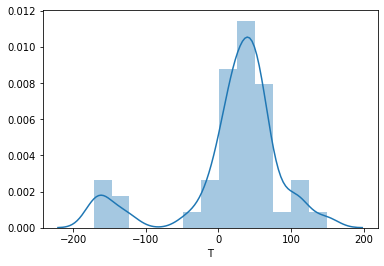

In [119]:
temptest = test.dropna()
sns.distplot(temptest['T'])# replacing missing values with mean

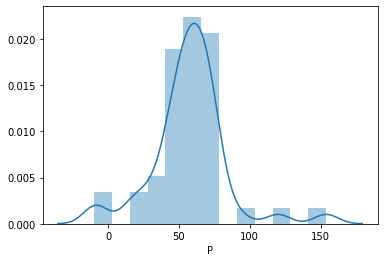

In [120]:
sns.distplot(temptest['P'])# replacing missing values with median

In [121]:
#data imputation of training data set
# replacing the missing data in column  with mean- as the data is uniform
# replacing the missing data in column D with median- as the data is scewed

train["T"] = train['T'].transform(lambda x: x.fillna(x.mean()))
train['QRST'] = train['QRST'].transform(lambda x: x.fillna(x.mean()))
train['P'] = train['P'].transform(lambda x: x.fillna(x.median()))
train['heartrate'] = train['heartrate'].transform(lambda x: x.fillna(x.mean()))

#test data 
test["T"] = test['T'].transform(lambda x: x.fillna(x.mean()))
test['P'] = test['P'].transform(lambda x: x.fillna(x.median()))

In [122]:
train.isna().sum(axis = 0)

age              0
sex              0
height           0
weight           0
QRSduration      0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 279, dtype: int64

# Exploratory Analysis

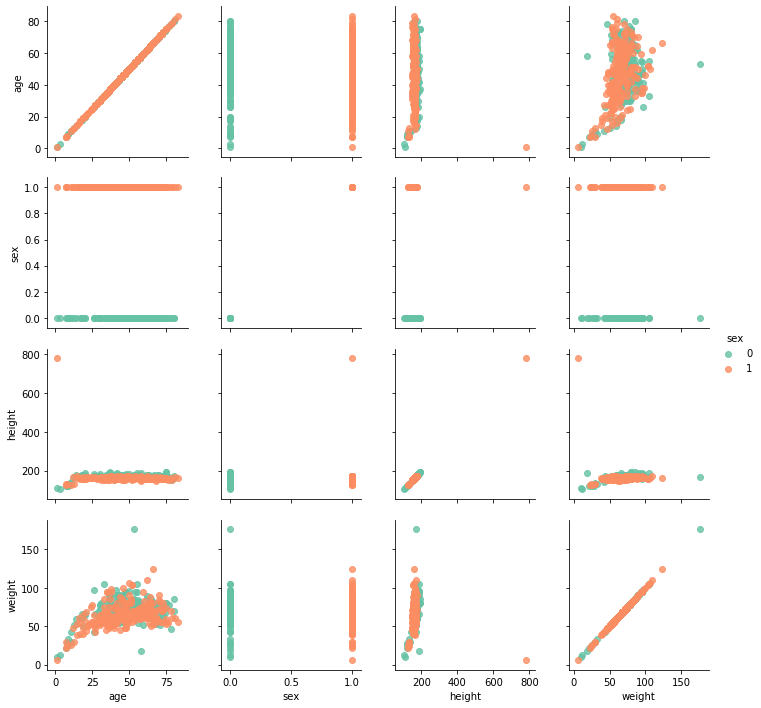

In [123]:
g = sns.PairGrid(train, vars=['age', 'sex', 'height', 'weight'],
                 hue='sex', palette='Set2')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# Modelling

# Models implemented

### KNN, Logistic Regression, Random forest on original data
### KNN, Logistic Regression, Linear SVM, Kernel SVM, Decision Tree, Random Forest - with PCA
### Ensemble Methods - Adaptive boosted logistic regression

In [124]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [125]:
X = train.drop('class',axis=1)
y = train['class']
X_test = test

In [126]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state = 10)

In [127]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

##### Since we have too many features, I used dimension reduction technique (PCA) for feature engineering and also checked with results on data without PCA
##### Implemeted various machine learning model to check best recall score

##### Since we are dealing with medical data, I considered recall score to reduce false negatives

# KNN Classification

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
kFold = StratifiedKFold(n_splits=5)
knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1,2,3,4,5,7,10]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'precision_macro', return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [129]:
grid_search.best_params_

{'n_neighbors': 1}

In [130]:
grid_search.best_score_

0.35757463348880947

In [131]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [132]:
y_pred_train = knn_clf.predict(X_train)
y_pred_valid = knn_clf.predict(X_valid)
y_pred_test = knn_clf.predict(X_test)

knn_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
knn_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(knn_train_p_score))
print('Test precision_score: {}'
      .format(knn_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 1.0
Test precision_score: 0.5207051282051283


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[24,  1,  2,  2,  2,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  1,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

# Logistic Regression

In [133]:
lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\skl

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is il

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: Conver

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [134]:
grid_search.best_params_

{'C': 10}

In [135]:
grid_search.best_score_

0.41240208491232916

In [136]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
lreg_clf.fit(X_train, y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_pred_train = lreg_clf.predict(X_train)
y_pred_valid = lreg_clf.predict(X_valid)
y_pred_test = lreg_clf.predict(X_test)

lreg_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
lreg_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')
print('Train Precision score: {}'
      .format(lreg_train_p_score))
print('Test precision_score: {}'
      .format(lreg_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train Precision score: 0.9603920845624386
Test precision_score: 0.6273504273504273


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[28,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  1,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

# Random Forest Method

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [100,150,200,250],
          'max_depth': [5, 10,14],
           'max_leaf_nodes':[20,25,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=Fals

In [139]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 100, 'max_leaf_nodes': 30}

In [140]:
grid_search.best_score_

0.5529012271626882

In [141]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=100, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
y_pred_train = rf_clf.predict(X_train)
y_pred_valid = rf_clf.predict(X_valid)
y_pred_test = rf_clf.predict(X_test)

rf_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
rf_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(rf_train_p_score))
print('Test precision_score: {}'
      .format(rf_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)




Train precision_score: 0.9454591782158822
Test precision_score: 0.620060975609756


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[28,  3,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  3,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Applying PCA to the Model

In [143]:
pca = PCA(n_components=50, svd_solver='auto')

X_train_pca = pca.fit_transform(X_train) #training
X_valid_pca = pca.transform(X_valid) #validation
X_test_pca = pca.transform(X_test) #test

In [144]:
X_train_pca.shape

(339, 50)

In [145]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.12012537, 0.2110568 , 0.27604753, 0.33744088, 0.39016912,
       0.43209851, 0.46999503, 0.49635045, 0.52063722, 0.54206241,
       0.56204771, 0.58170584, 0.59907674, 0.61431181, 0.62852751,
       0.64203306, 0.65487098, 0.66731345, 0.67823064, 0.68894733,
       0.69899088, 0.70836253, 0.71761744, 0.72635355, 0.73475537,
       0.74296125, 0.75102956, 0.7587944 , 0.76609843, 0.77316072,
       0.77990986, 0.78627102, 0.79249362, 0.79860534, 0.80455663,
       0.81031223, 0.81598333, 0.82124664, 0.8264053 , 0.8314545 ,
       0.8362981 , 0.84111835, 0.84585242, 0.85042223, 0.85484695,
       0.85925423, 0.86351881, 0.86750246, 0.87140549, 0.87525012])

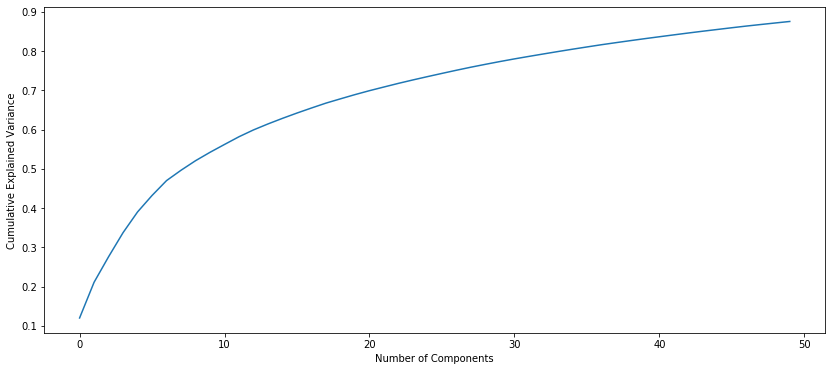

In [146]:
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# Logistic Regression with PCA

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score

kFold = StratifiedKFold(n_splits=5)

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\skl

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [148]:
grid_search.cv_results_

{'mean_fit_time': array([0.03516026, 0.03984385, 0.02704935, 0.01277485, 0.01005974,
        0.01164031, 0.02636743, 0.04545822]),
 'std_fit_time': array([4.65368814e-03, 3.69145882e-03, 4.19768556e-03, 1.60193595e-03,
        4.46597139e-05, 6.86534005e-04, 2.01970528e-03, 6.27917475e-03]),
 'mean_score_time': array([0.00238962, 0.        , 0.        , 0.00159788, 0.0007988 ,
        0.00120058, 0.00239658, 0.00159807]),
 'std_score_time': array([0.00195116, 0.        , 0.        , 0.001957  , 0.0015976 ,
        0.00158925, 0.0019568 , 0.00195723]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.17006033,
        0.30752794,

In [149]:
grid_search.best_params_

{'C': 10}

In [150]:
grid_search.best_score_

0.4259927577800245

In [151]:
lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
lreg_clf.fit(X_train_pca, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred_train = lreg_clf.predict(X_train_pca)
y_pred_valid = lreg_clf.predict(X_valid_pca)
y_pred_test = lreg_clf.predict(X_test_pca)

logreg_pca_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
logreg_pca_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(logreg_pca_train_p_score))
print('Valid precision_score: {}'
      .format(logreg_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)


Train precision_score: 0.9085833479939502
Valid precision_score: 0.6105691056910569


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[29,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

# KNN Classification with PCA

In [153]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)

param_grid={'n_neighbors':[1,2,3,4,5,7,10]}

grid_search = GridSearchCV(knn_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [154]:
grid_search.cv_results_

{'mean_fit_time': array([0.00079913, 0.00159793, 0.00079851, 0.00319619, 0.00239787,
        0.00240378, 0.00239735]),
 'std_fit_time': array([0.00159826, 0.00195706, 0.00159702, 0.0015981 , 0.00195785,
        0.00196272, 0.00195743]),
 'mean_score_time': array([0.01917448, 0.02157159, 0.01997819, 0.01598473, 0.01946864,
        0.01678634, 0.01616511]),
 'std_score_time': array([1.59783369e-03, 3.19662104e-03, 1.21687871e-05, 1.28014571e-05,
        2.71974386e-03, 1.61041894e-03, 3.87094120e-04]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 7, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 10}],
 'split0_test_score': array([0.35029028, 0.27490542, 0.20927022, 0.23310023, 0.25414201,
        0.19340659, 0.19337607]),
 'split1_test_score

In [155]:
grid_search.best_params_

{'n_neighbors': 1}

In [156]:
grid_search.best_score_

0.35757463348880947

In [157]:
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [158]:
y_pred_train = knn_clf.predict(X_train_pca)
y_pred_valid = knn_clf.predict(X_valid_pca)
y_pred_test = knn_clf.predict(X_test_pca)

knn_pca_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
knn_pca_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')
print('Train precision_score: {}'
      .format(knn_pca_train_p_score))
print('Vaild precision score: {}'
      .format(knn_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 1.0
Vaild precision score: 0.5511111111111112


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[26,  2,  0,  1,  2,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0]], dtype=int64)

# Linear SVM with PCA

In [159]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\s

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Un

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='crammer_singer', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [160]:
grid_search.cv_results_

{'mean_fit_time': array([0.0007987 , 0.00319476, 0.00479393, 0.00958652, 0.01757526,
        0.04234343, 0.18670006, 0.7174613 ]),
 'std_fit_time': array([0.0015974 , 0.00159738, 0.0015981 , 0.00195704, 0.00195768,
        0.00649046, 0.04675335, 0.18563137]),
 'mean_score_time': array([0.        , 0.00159044, 0.00159774, 0.00319619, 0.00239811,
        0.00159774, 0.00124793, 0.00239797]),
 'std_score_time': array([0.        , 0.00194792, 0.00195682, 0.0015981 , 0.00195805,
        0.00195682, 0.00161693, 0.001958  ]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.22902098, 0.15145427, 0.15145427, 0.15145427, 0.36620879,
        0.3025641 , 0.34432234, 0.30697154]),
 'spl

In [161]:
grid_search.best_params_

{'C': 1}

In [162]:
grid_search.best_score_

0.4913511276880359

In [163]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=1)
LSVC_clf.fit(X_train_pca, y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [164]:
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_valid = LSVC_clf.predict(X_valid_pca)
y_pred_valid = LSVC_clf.predict(X_valid_pca)

lscvc_pca_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
lscv_pca_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')
print('Train precision_score: {}'
      .format(lscvc_pca_train_p_score))
print('Vaild precision_score: {}'
      .format(lscv_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 0.8572398436086702
Vaild precision_score: 0.5766666666666667


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[27,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

# Kernalised SVM with PCA

In [165]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [166]:
grid_search.cv_results_

{'mean_fit_time': array([0.00639105, 0.00640035, 0.00559411, 0.00479245, 0.00478187,
        0.00400395, 0.00559244, 0.00479441, 0.00478845, 0.00559549,
        0.00479336, 0.00718451, 0.00479393, 0.00399027, 0.00717993,
        0.00639815, 0.01277189, 0.01838078, 0.00718322, 0.00399823,
        0.00718856, 0.00800638, 0.01597686, 0.0207799 , 0.00559053,
        0.00800109, 0.0079824 , 0.00799794, 0.01838269, 0.02237258,
        0.007197  , 0.00719075, 0.00799007, 0.00718598, 0.02009163,
        0.0212008 ]),
 'std_fit_time': array([1.95680232e-03, 1.96358269e-03, 1.95614220e-03, 1.60411250e-03,
        1.59195642e-03, 1.35134338e-05, 1.95886688e-03, 1.60214921e-03,
        1.60004103e-03, 1.94466423e-03, 1.59790076e-03, 1.59472586e-03,
        1.58216517e-03, 1.52860339e-05, 1.59473312e-03, 1.96253457e-03,
        1.60233799e-03, 4.07600829e-03, 1.59372123e-03, 2.33277198e-05,
        1.59669333e-03, 2.15999338e-05, 5.37241234e-06, 1.61336654e-03,
        1.95526659e-03, 1.82902949e-0

In [167]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [168]:
grid_search.best_score_

0.5155367493317345

In [169]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)
KSVC_clf.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [170]:
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_valid = KSVC_clf.predict(X_valid_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

kscv_pca_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
kscv_pca_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')
print('Train Recall score: {}'
      .format(kscv_pca_train_p_score))
print('Test Recall score: {}'
      .format(kscv_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train Recall score: 0.9378496182088837
Test Recall score: 0.5699206349206349


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[29,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

# Decision Trees with PCA

In [171]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},

In [172]:
grid_search.cv_results_

{'mean_fit_time': array([0.00319591, 0.00560851, 0.00558472, 0.00480175, 0.00638485,
        0.00799074, 0.01118584]),
 'std_fit_time': array([1.59814477e-03, 1.94265458e-03, 1.96277998e-03, 1.60479618e-03,
        1.94791306e-03, 1.82003190e-05, 1.59584213e-03]),
 'mean_score_time': array([0.00159788, 0.        , 0.00239758, 0.00319524, 0.0007988 ,
        0.00159783, 0.0008008 ]),
 'std_score_time': array([0.00195712, 0.        , 0.00195762, 0.00159762, 0.0015976 ,
        0.00195694, 0.0016016 ]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 20}],
 'split0_test_score': array([0.07918552, 0.12735043, 0.10027473, 0.20697648, 0.16183816,
        0.18717949, 0.19824561]),
 'split1_test_score': array([0.15

In [173]:
grid_search.best_params_

{'max_depth': 10}

In [174]:
grid_search.best_score_

0.2974778299949171

In [175]:
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [176]:
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_valid = dt_clf.predict(X_valid_pca)
y_pred_test = dt_clf.predict(X_test_pca)

dt_pca_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
dt_pca_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(dt_pca_train_p_score))
print('Test precision_score: {}'
      .format(dt_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 0.9368042082337183
Test precision_score: 0.5068803418803419


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[25,  2,  0,  1,  0,  0,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  2,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1]], dtype=int64)

# Random Forest with PCA

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [10,20,30,40,50],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sr

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=Fals

In [178]:
grid_search.cv_results_

{'mean_fit_time': array([0.22203059, 0.215379  , 0.23631163, 0.22615089, 0.27025185,
        0.27704473, 0.26029096, 0.28891301, 0.30796251, 0.3076859 ,
        0.31784391, 0.32624106, 0.38439245, 0.38566532, 0.39709363,
        0.38222075, 0.46639495, 0.49529428, 0.42259545, 0.45152349,
        0.23319783, 0.23153105, 0.23354526, 0.23962841, 0.2750442 ,
        0.33075829, 0.31472454, 0.31179757, 0.37470436, 0.3948256 ,
        0.34561253, 0.38052983, 0.54978542, 0.42778683, 0.44512544,
        0.43949428, 0.54690752, 0.49525952, 0.52261209, 0.53878422,
        0.24334388, 0.26528769, 0.27470441, 0.28390193, 0.30655041,
        0.33863316, 0.33462181, 0.37437892, 0.44858913, 0.3635201 ,
        0.41034241, 0.40901685, 0.4487402 , 0.52091722, 0.48289776,
        0.53348751, 0.54916978, 0.53014436, 0.563411  , 0.65305791,
        0.25600891, 0.22415814, 0.24837632, 0.2528523 , 0.28665295,
        0.2962266 , 0.30547094, 0.33098722, 0.37075653, 0.33529553,
        0.36293736, 0.37613831,

In [179]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 40, 'max_leaf_nodes': 50}

In [180]:
grid_search.best_score_

0.36221972909869243

In [181]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=40,max_depth=10,max_leaf_nodes=50)
rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=40, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
y_pred_train = rf_clf.predict(X_train_pca)
y_pred_valid = rf_clf.predict(X_valid_pca)
y_pred_test = rf_clf.predict(X_test_pca)

rf_pca_train_p_score = recall_score(y_train, y_pred_train, average='weighted')
rf_pca_valid_p_score = recall_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(rf_pca_train_p_score))
print('Test precision score: {}'
      .format(rf_pca_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 0.9646017699115044
Test precision score: 0.5666666666666667


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[30,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [183]:
y_valid.value_counts()

1     32
10    10
6      4
5      3
4      3
2      3
16     2
7      2
8      1
Name: class, dtype: int64

In [184]:
train_p_scores= [knn_train_p_score, lreg_train_p_score, rf_train_p_score, knn_pca_train_p_score,
                      logreg_pca_train_p_score, lscvc_pca_train_p_score, kscv_pca_train_p_score, 
                      dt_pca_train_p_score, rf_pca_train_p_score]

valid_p_scores= [knn_valid_p_score, lreg_valid_p_score,rf_valid_p_score, knn_pca_valid_p_score,
                     logreg_pca_valid_p_score, lscv_pca_valid_p_score, kscv_pca_valid_p_score, 
                     dt_pca_valid_p_score, rf_pca_valid_p_score]

classifiers = ['KNN Clasification', 'Logistic Regression','Random Forest', 'KNN Classification with PCA', 'Logistic Regression with PCA', 'Linear SVM with PCA',
               'Kernalised SVM with PCA', 'Decision Trees with PCA', 'Random Forest with PCA']

In [185]:
table = pd.DataFrame ([train_p_scores, valid_p_scores], columns=classifiers, index=['Train Precision Score', 'Valid Precision Score'])
Table=table.T
Table

,Train Precision Score,Valid Precision Score
KNN Clasification,1.000000,0.520705
Logistic Regression,0.960392,0.627350
Random Forest,0.945459,0.620061
KNN Classification with PCA,1.000000,0.551111
Logistic Regression with PCA,0.908583,0.610569
Linear SVM with PCA,0.857240,0.576667
Kernalised SVM with PCA,0.937850,0.569921
Decision Trees with PCA,0.936804,0.506880
Random Forest with PCA,0.964602,0.566667


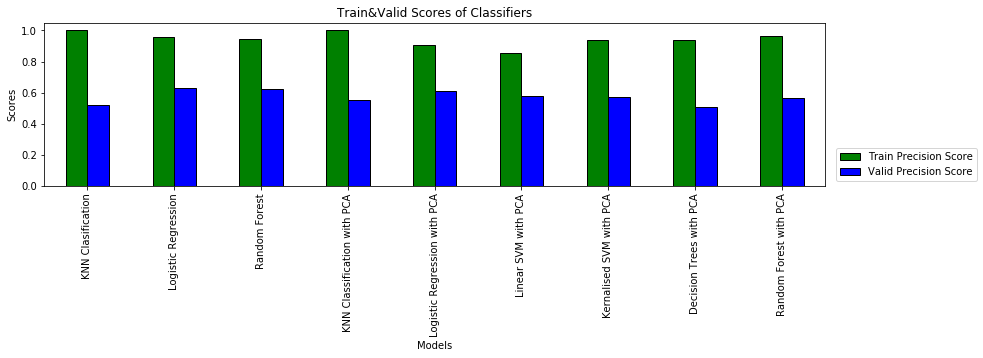

In [186]:
Table.plot(kind='bar', figsize=(14,3), color='gbmykc',  edgecolor='k')

plt.title('Train&Valid Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

From the above plot, we could see that Random Forest and Logistic Regression outperformed other models without PCA. 
For all other models, the difference between train precision score and valid precision score is more higher which could potentially lead to overfitting
For the next steps, we could try ensemble methods to try training logistic regression weak learner and see if it can improve precision score

# Adaptive Boosting technique on Logistic regression

In [187]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = lreg_clf, learning_rate = 0.1, n_estimators=50)

param_grid = {'learning_rate': [0.001,0.01,0.1,1,10,100],
             'n_estimators': [50,100,150,200]}


grid_search = GridSearchCV(adaboost_clf, param_grid, scoring = 'precision_macro',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Unde

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\l

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Unde

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in l

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=LogisticRegression(C=10,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='multinomial',
                                                                      

In [188]:
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [189]:
grid_search.best_score_

0.42465154805862765

In [190]:
adaboost_clf = AdaBoostClassifier(base_estimator = lreg_clf, learning_rate = 1, n_estimators=100)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_valid, y_valid)))

Train score: 0.75
Test score: 0.60


In [191]:
y_pred_train = lreg_clf.predict(X_train_pca)
y_pred_valid = lreg_clf.predict(X_valid_pca)
y_pred_test = lreg_clf.predict(X_test_pca)

ada_lr_train_p_score = precision_score(y_train, y_pred_train, average='weighted')
ada_lr_valid_p_score = precision_score(y_valid, y_pred_valid, average='weighted')

print('Train precision_score: {}'
      .format(ada_lr_train_p_score))
print('Test precision_score: {}'
      .format(ada_lr_valid_p_score))

metrics.confusion_matrix(y_valid, y_pred_valid)

Train precision_score: 0.9085833479939502
Test precision_score: 0.6105691056910569


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[29,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

### Since boosted logistic regression is giving similar performance to logistic regression. For the sake of interpretabbility of parameters, I'm considering logistic regression as best model w.r.t precision macro metric 

# Final predictions on test dataset

In [192]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
lreg_clf.fit(X_train, y_train)

final_test_prediction = lreg_clf.predict(X_test)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [193]:
type(final_test_prediction)

numpy.ndarray

In [194]:
test['class'] = final_test_prediction

In [195]:
final_test_prediction.shape


(52,)

In [196]:
test

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1,1
1,44,0,169,80,109,128,382,195,60,-34,...,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2,9
2,58,1,163,68,71,136,339,152,76,13,...,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5,1
3,50,1,160,73,75,125,353,183,63,38,...,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5,1
4,45,0,175,80,94,163,401,159,106,-57,...,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9,6
5,30,1,158,57,73,137,369,143,77,30,...,0.0,9.5,0.0,0,0,0.4,0.5,22.8,26.0,1
6,37,1,155,60,76,166,384,172,100,34,...,0.0,7.7,0.0,0,0,0.6,1.9,26.1,40.5,1
7,31,1,161,73,93,173,361,164,108,63,...,-0.7,8.5,0.0,0,0,0.7,1.5,31.5,43.5,1
8,40,0,162,65,114,191,383,222,98,64,...,-1.6,8.8,-1.2,0,0,0.6,-0.6,14.0,9.0,4
9,68,0,161,70,170,192,419,264,116,62,...,0.0,10.1,-2.6,0,0,0.0,-3.3,46.7,2.5,2
